In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# plt.rcParams['text.usetex'] = True
# plt.rcParams['text.latex.unicode'] = True

In [17]:
files = os.listdir('../results')

In [18]:
[i for i in files if 'u_8-chain1-NNI-0.2_ns' in i]

['u_8-chain1-NNI-0.2_ns-8_ne-10_i-1_dist-0.5',
 'u_8-chain1-NNI-0.2_ns-8_ne-10_i-1_dist-1',
 'u_8-chain1-NNI-0.2_ns-8_ne-12_i-1_dist-0.5',
 'u_8-chain1-NNI-0.2_ns-8_ne-12_i-1_dist-1',
 'u_8-chain1-NNI-0.2_ns-8_ne-14_i-1_dist-0.5',
 'u_8-chain1-NNI-0.2_ns-8_ne-14_i-1_dist-1',
 'u_8-chain1-NNI-0.2_ns-8_ne-2_i-1_dist-0.5',
 'u_8-chain1-NNI-0.2_ns-8_ne-4_i-1_dist-0.5',
 'u_8-chain1-NNI-0.2_ns-8_ne-6_i-1_dist-0.5',
 'u_8-chain1-NNI-0.2_ns-8_ne-6_i-1_dist-1',
 'u_8-chain1-NNI-0.2_ns-8_ne-8_i-1_dist-0.5',
 'u_8-chain1-NNI-0.2_ns-8_ne-8_i-1_dist-1']

# graph 1: densities in the chain 1
This is a graph representing single impurity embedding

In [4]:
folder = '../results/u_8-chain1_ns-8_ne-8_i-1_dist-0.2'
os.listdir(folder)


['Densities.svg',
 'e.dat',
 'Energy_errors.svg',
 'Energy_errors_per_site.svg',
 'e_per_site.dat',
 'e_ref.dat',
 'e_ref_per_site.dat',
 'occupation',
 'systems.txt',
 'v_hxc',
 'v_hxc_progression_list.dat',
 'v_hxc_ref_progress.dat',
 'v_hxc_trend.svg',
 'x.dat',
 'y.dat',
 'y_ref.dat',
 'y_simple.dat']

In [5]:
x = np.loadtxt(folder + '/x.dat')
y_lpfet = np.loadtxt(folder + '/y_simple.dat')
y_ref = np.loadtxt(folder + '/y_ref.dat')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


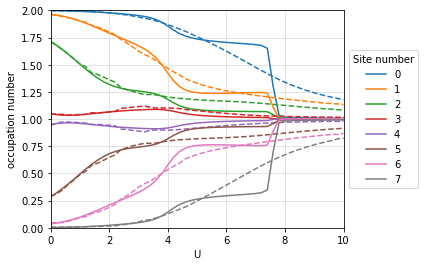

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
for i in range(len(y_lpfet[0])):
    plt.plot(x, y_lpfet[:, i], c=mpl.cm.get_cmap('tab10')(i), linestyle='--')
    plt.plot(x, y_ref[:, i], c=mpl.cm.get_cmap('tab10')(i), label=f"{str(i)}")
plt.xlabel('U')
plt.ylabel("occupation number")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])
# ax.legend(title='Site number', loc='center left', bbox_to_anchor=(0.5, 1.05),
#            ncol=3, fancybox=True, shadow=True)
ax.legend( bbox_to_anchor=(1, 0.5), title='Site number', loc='center left')
ax.set_ylim(0, 2)
ax.set_xlim(0, 10)
ax.grid(c='#DDDDDD')
plt.savefig(f'figure1.png', dpi=300, bbox_inches='tight')
plt.savefig(f'figure1.eps', dpi=300, bbox_inches='tight')
#fig.show()
# plt.close(fig)

# Figure 2
energy contributions

In [7]:
x = np.loadtxt(folder + '/x.dat')
e = np.loadtxt(folder + '/e.dat', dtype = [('tot', float), ('kin', float), ('v_ext', float), ('u', float),  ('v_term', float)])
e_ref = np.loadtxt(folder + '/e_ref.dat', dtype = [('tot', float), ('kin', float), ('v_ext', float), ('u', float),  ('v_term', float)])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


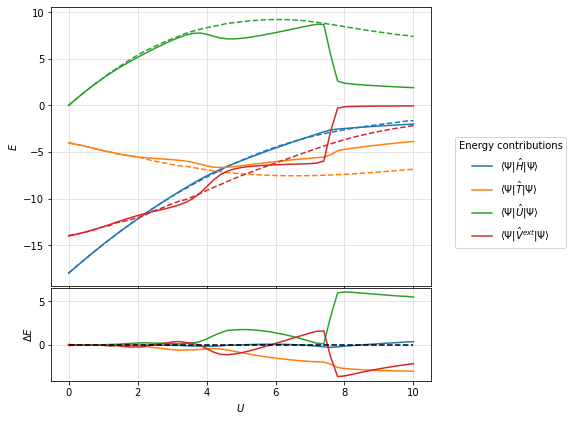

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex='all', gridspec_kw={'height_ratios': [3, 1]})
fig.tight_layout()
fig.subplots_adjust(hspace=0.01, top=0.93)
ax[0].grid(True, color='#DDDDDD')
ax[1].grid(True, color='#DDDDDD')
ax[0].plot(x, e['tot'], c=mpl.cm.get_cmap('tab10')(0), linestyle='--')
ax[0].plot(x, e_ref['tot'], c=mpl.cm.get_cmap('tab10')(0), label=r'''$\langle\Psi|\hat{H}|\Psi \rangle$''')
ax[0].plot(x, e['kin'], c=mpl.cm.get_cmap('tab10')(1), linestyle='--')
ax[0].plot(x, e_ref['kin'], c=mpl.cm.get_cmap('tab10')(1), label=r'''$\langle\Psi|\hat{T}|\Psi \rangle$''')
ax[0].plot(x, e['u'], c=mpl.cm.get_cmap('tab10')(2), linestyle='--')
ax[0].plot(x, e_ref['u'], c=mpl.cm.get_cmap('tab10')(2), label=r'''$\langle\Psi|\hat{U}|\Psi \rangle$''')
ax[0].plot(x, e['v_ext'], c=mpl.cm.get_cmap('tab10')(3), linestyle='--')
ax[0].plot(x, e_ref['v_ext'], c=mpl.cm.get_cmap('tab10')(3), label=r'''$\langle\Psi|\hat{V}^{ext}|\Psi \rangle$''')
# ax[0].plot(x, e['v_term'], c=mpl.cm.get_cmap('tab10')(4), label='v_term contribution')
# ax[0].plot(x, e_ref['v_term'], c=mpl.cm.get_cmap('tab10')(4), linestyle='--')
plt.xlabel('$U$')
ax[0].set_ylabel('$E$')
ax[1].set_ylabel(r'''$\Delta E$''')
ax[1].plot(x, e['tot'] - e_ref['tot'], c=mpl.cm.get_cmap('tab10')(0))
ax[1].plot(x, e['kin'] - e_ref['kin'], c=mpl.cm.get_cmap('tab10')(1))
ax[1].plot(x, e['u'] - e_ref['u'], c=mpl.cm.get_cmap('tab10')(2))
ax[1].plot(x, e['v_ext'] - e_ref['v_ext'], c=mpl.cm.get_cmap('tab10')(3))
# ax[1].plot(x, e['v_term'] - e_ref['v_term'], c=mpl.cm.get_cmap('tab10')(4))
ax[1].plot(x, [0] * len(x), c='k', linestyle='--')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Energy contributions')
plt.savefig(f'figure2.png', dpi=300, bbox_inches='tight')
plt.savefig(f'figure2.eps', dpi=300, bbox_inches='tight')
# plt.savefig(f'{folder_name}/Energy_errors.svg', dpi=300, bbox_inches='tight')
# plt.close(fig)

# Figure 3
V term effects

../results/u_8-chain1-NNI-0.2_ns-8_ne-2_i-1_dist-0.5 False
[1, 8, 14, 20] 21 21
../results/u_8-chain1-NNI-0.2_ns-8_ne-4_i-1_dist-0.5 True
[0, 7, 13, 19] 20 20
../results/u_8-chain1-NNI-0.2_ns-8_ne-6_i-1_dist-0.5 True
[1, 8, 14, 20] 21 21
../results/u_8-chain1-NNI-0.2_ns-8_ne-8_i-1_dist-0.5 True
[4, 10, 16] 17 17
../results/u_8-chain1-NNI-0.2_ns-8_ne-10_i-1_dist-0.5 True
../results/u_8-chain1-NNI-0.2_ns-8_ne-12_i-1_dist-0.5 True
../results/u_8-chain1-NNI-0.2_ns-8_ne-14_i-1_dist-0.5 False


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


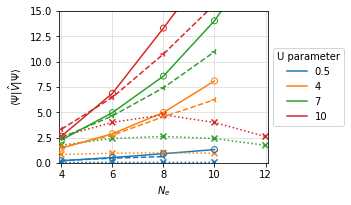

In [191]:
file_name = '../results/u_8-chain1-NNI-0.2_ns-8_ne-{}_i-1_dist-0.5'
file_name_block = '../results/u_8-chain1-block-2-NNI-0.2_ns-8_ne-{}_i-1_dist-0.5'
first = True
fig, ax = plt.subplots(1, 1, figsize=(5, 2.8))
ax.set_ylim(0, 15)
ax.set_xlim(3.9, 12.1)
ax.grid(True, color='#DDDDDD', zorder=1)
ax.xaxis.set_ticks(np.arange(4, 12.1, 2))
plot_dict = {'e_ref':{}, 'e':{}, 'e2':{}}
points = [0.5, 4, 7, 10]
for point in points:
    plot_dict['e_ref'][point] = [[], []]
    plot_dict['e'][point] = [[], []]
    plot_dict['e2'][point] = [[], []]
for i in [2, 4, 6, 8, 10, 12, 14]:
    tfn = file_name.format(i)
    tfn_block = file_name_block.format(i)
    if os.path.isfile(tfn_block + '/e_ref.dat'):
        x = np.loadtxt(tfn_block + '/x.dat')
        e = np.loadtxt(tfn_block + '/e.dat', dtype = [('tot', float), ('kin', float), ('v_ext', float), ('u', float),  ('v_term', float)])
        points_i = []
        colors_i = []
        for id_j, j in enumerate(points):
            if j in x:
                points_i.append(np.argwhere(np.isclose(x, j))[0][0])
                colors_i.append(id_j)
        print(points_i, len(x), len(e))
        for point in points_i:
            plot_dict['e2'][x[point]][0].append(i)
            plot_dict['e2'][x[point]][1].append(e['v_term'][point])
        ax.scatter(np.zeros(len(e))[points_i] + i, e['v_term'][points_i], c=mpl.cm.get_cmap('tab10')(colors_i), marker="3", zorder=8)
    print(tfn, os.path.isdir(tfn_block))
    if os.path.isfile(tfn + '/e_ref.dat'):

        x = np.loadtxt(tfn + '/x.dat')
        e_ref = np.loadtxt(tfn + '/e_ref.dat', dtype = [('tot', float), ('kin', float), ('v_ext', float), ('u', float),  ('v_term', float)])
        e = np.loadtxt(tfn + '/e.dat', dtype = [('tot', float), ('kin', float), ('v_ext', float), ('u', float),  ('v_term', float)])
        points_i = []
        colors_i = []
        for id_j, j in enumerate(points):
            if j in x:
                points_i.append(np.argwhere(np.isclose(x, j))[0][0])
                colors_i.append(id_j)
        for point in points_i:

            plot_dict['e_ref'][x[point]][0].append(i)
            plot_dict['e_ref'][x[point]][1].append(e_ref['v_term'][point])
            plot_dict['e'][x[point]][0].append(i)
            plot_dict['e'][x[point]][1].append(e['v_term'][point])

        ax.scatter(np.zeros(len(e_ref))[points_i] + i, e_ref['v_term'][points_i], edgecolors=mpl.cm.get_cmap('tab10')(colors_i), zorder=9, facecolors='none')
        ax.scatter(np.zeros(len(e))[points_i] + i, e['v_term'][points_i], c=mpl.cm.get_cmap('tab10')(colors_i), marker='x', zorder=7)
        first = False
style_dict = {'e_ref': 'solid', 'e': 'dotted', 'e2': 'dashed'}
for key1, value1 in plot_dict.items():
    qwe = 0
    for u, data in value1.items():
        
        if key1=='e_ref':
            ax.plot(data[0], data[1], c=mpl.cm.get_cmap('tab10')(qwe), linestyle=style_dict[key1], label=u)
        else:
            ax.plot(data[0], data[1], c=mpl.cm.get_cmap('tab10')(qwe), linestyle=style_dict[key1])
        qwe += 1
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])
# ax.legend(title='Site number', loc='center left', bbox_to_anchor=(0.5, 1.05),
#            ncol=3, fancybox=True, shadow=True)
ax.legend( bbox_to_anchor=(1, 0.5), title='U parameter', loc='center left')
ax.set_xlabel('$N_e$')
ax.set_ylabel(r'''$\langle\Psi|\hat{V}|\Psi \rangle$''')

plt.savefig(f'figure3_v-term.png', dpi=300, bbox_inches='tight')
plt.savefig(f'figure3_v-term.eps', dpi=300, bbox_inches='tight')

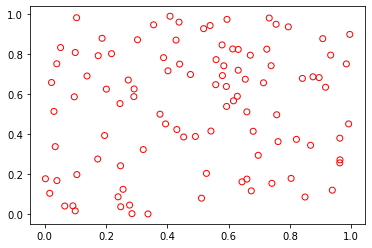

In [190]:
plt.scatter(np.random.random(100), np.random.random(100), facecolors='none', edgecolors='r')

# Figure 4 Comparison of blokcs

In [120]:
file_name = '../results/u_8-chain1{}_ns-8_ne-8_i-1_dist-0.5'
options = ['', '_block-2', '_block-332', '_block-4']
labels = ['single impurity', '2222', '332', '44']

../results/u_8-chain1_ns-8_ne-8_i-1_dist-0.5 True
../results/u_8-chain1_block-2_ns-8_ne-8_i-1_dist-0.5 True
../results/u_8-chain1_block-332_ns-8_ne-8_i-1_dist-0.5 True
../results/u_8-chain1_block-4_ns-8_ne-8_i-1_dist-0.5 True


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


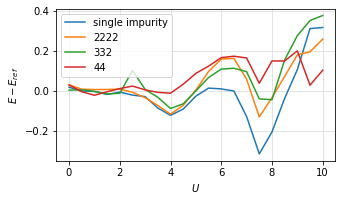

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(5, 2.8))
# ax.set_ylim(0, 10)
# ax.set_xlim(3.9, 12.1)
ax.grid(True, color='#DDDDDD', zorder=1)
# ax.xaxis.set_ticks(np.arange(4, 12, 2))
x = False
first = True
x = np.loadtxt(file_name.format('')  + '/x.dat')
e_ref = np.loadtxt(file_name.format('') + '/e_ref.dat', dtype = [('tot', float), ('kin', float), ('v_ext', float), ('u', float),  ('v_term', float)])
# ax.plot(x, e_ref['tot'], c='k')
for id1, option in enumerate(options):
    tfn = file_name.format(option)
    print(tfn, os.path.isdir(tfn))
    if not os.path.isfile(tfn + '/e_ref.dat'):
        continue
    e = np.loadtxt(tfn + '/e.dat', dtype = [('tot', float), ('kin', float), ('v_ext', float), ('u', float),  ('v_term', float)])
    ax.plot(x, e['tot']-e_ref['tot'], c=mpl.cm.get_cmap('tab10')(id1), label=labels[id1])
    first = False
plt.legend()
ax.set_xlabel('$U$')
ax.set_ylabel('$E - E_{ref}$')
plt.savefig(f'figure4_block-errors-e.png', dpi=300, bbox_inches='tight')
plt.savefig(f'figure4_block-errors-e.eps', dpi=300, bbox_inches='tight')

# Figure 5
comparison of blocks: rms deviations in density:

In [120]:
file_name = '../results/u_8-chain1{}_ns-8_ne-8_i-1_dist-0.5'
options = ['', '_block-2', '_block-332', '_block-4']
labels = ['single impurity', '2222', '332', '44']

../results/u_8-chain1_ns-8_ne-8_i-1_dist-0.5 True
../results/u_8-chain1_block-2_ns-8_ne-8_i-1_dist-0.5 True
../results/u_8-chain1_block-332_ns-8_ne-8_i-1_dist-0.5 True
../results/u_8-chain1_block-4_ns-8_ne-8_i-1_dist-0.5 True


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


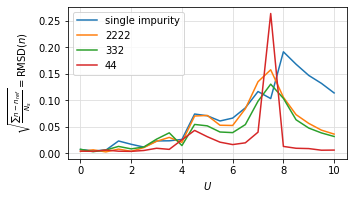

In [141]:
fig, ax = plt.subplots(1, 1, figsize=(5, 2.8))
# ax.set_ylim(0, 10)
# ax.set_xlim(3.9, 12.1)
ax.grid(True, color='#DDDDDD', zorder=1)
# ax.xaxis.set_ticks(np.arange(4, 12, 2))
x = False
first = True
x = np.loadtxt(file_name.format('')  + '/x.dat')
y_ref = np.loadtxt(file_name.format('') + '/y_ref.dat')
# ax.plot(x, e_ref['tot'], c='k')
for id1, option in enumerate(options):
    tfn = file_name.format(option)
    print(tfn, os.path.isdir(tfn))
    if not os.path.isfile(tfn + '/y_ref.dat'):
        continue
    y = np.loadtxt(tfn + '/y_simple.dat')
    ax.plot(x, np.sqrt(np.mean(np.square(y-y_ref), axis=1)), c=mpl.cm.get_cmap('tab10')(id1), label=labels[id1])
    first = False
plt.legend()
ax.set_xlabel('$U$')
ax.set_ylabel(r'''$\sqrt{\frac{\sum n - n_{ref}}{N_s}}=$RMSD$(n)}$''')

plt.savefig(f'figure5_block-errors-n.png', dpi=300, bbox_inches='tight')
plt.savefig(f'figure5_block-errors-n.eps', dpi=300, bbox_inches='tight')

In [129]:
np.mean(np.square(y_ref-y), axis=1)

array([4.54913531e-05, 1.71996835e-05, 3.12284508e-05, 5.24129762e-04,
       2.77041780e-04, 1.28311591e-04, 5.28184370e-04, 5.38846127e-04,
       6.65998507e-04, 5.45888304e-03, 4.97588072e-03, 3.68347820e-03,
       4.37739794e-03, 7.30842376e-03, 1.35501822e-02, 1.06262005e-02,
       3.66952207e-02, 2.82316431e-02, 2.15685313e-02, 1.73807936e-02,
       1.29329738e-02])

# Figure 6
similar to figure 5 but with NNI

../results/u_8-chain1-NNI-0.2_ns-8_ne-8_i-1_dist-0.5 True
[36.12630531 31.453178   26.75695525 22.35452422 19.64147495 15.26236358
 10.53648709  5.8687116 ]
../results/u_8-chain1_block-2_NNI-0.2_ns-8_ne-8_i-1_dist-0.5 True
[33.77249927 28.20439353 25.94023699 21.56913245 20.25681591 15.99971262
 13.00732253  9.2498867 ]
../results/u_8-chain1_block-2_NNI-0.2_v2_ns-8_ne-8_i-1_dist-0.5 True
[33.77249927 28.20439353 25.94023699 21.56913245 20.25681591 15.99971262
 13.00732253  9.2498867 ]


Text(0, 0.5, '$\\sqrt{\\frac{\\sum n - n_{ref}}{N_s}}=$RMSD$(n)}$')

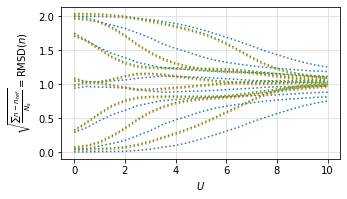

In [158]:
file_name = '../results/u_8-chain1{}_ns-8_ne-8_i-1_dist-0.5'
options = ['-NNI-0.2', '_block-2_NNI-0.2', '_block-2_NNI-0.2_v2']
labels = ['SINGLE', 'BLOCK2', 'block2-v2']
fig, ax = plt.subplots(1, 1, figsize=(5, 2.8))
# ax.set_ylim(0, 10)
# ax.set_xlim(3.9, 12.1)
ax.grid(True, color='#DDDDDD', zorder=1)
# ax.xaxis.set_ticks(np.arange(4, 12, 2))
x = False
first = True
x = np.loadtxt(file_name.format('')  + '/x.dat')
y_ref = np.loadtxt(file_name.format('') + '/y_ref.dat')
# ax.plot(x, e_ref['tot'], c='k')
for id1, option in enumerate(options):
    tfn = file_name.format(option)
    print(tfn, os.path.isdir(tfn))
    if not os.path.isfile(tfn + '/y_ref.dat'):
        continue
    y = np.loadtxt(tfn + '/y_simple.dat')
    print(sum(y))
    # ax.plot(x, np.sqrt(np.mean(np.square(y-y_ref), axis=1)), c=mpl.cm.get_cmap('tab10')(id1), label=labels[id1])
    for site in range(8):
        ax.plot(x, y[:, site] + id1 * 0.02, c=mpl.cm.get_cmap('tab10')(id1), label=labels[id1], linestyle='dotted')
    first = False
# plt.legend()
ax.set_xlabel('$U$')
ax.set_ylabel(r'''$\sqrt{\frac{\sum n - n_{ref}}{N_s}}=$RMSD$(n)}$''')

# plt.savefig(f'figure5_block-errors-n.png', dpi=300, bbox_inches='tight')
# plt.savefig(f'figure5_block-errors-n.eps', dpi=300, bbox_inches='tight')